# Data Cleaning & Merging

This notebook performs data cleaning, merging, and exploratory data analysis for the **Credit Card Approval Prediction** dataset.

**Steps:**
1. Clean `application_record.csv`
2. Aggregate and label `credit_record.csv`
3. Merge the datasets
4. Conduct basic EDA (distributions, correlations, imbalance)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set seaborn style for cleaner visuals
sns.set(style="whitegrid")

## Load Datasets

In [2]:
application = pd.read_csv("../data/application_record.csv")
credit = pd.read_csv("../data/credit_record.csv")

print("Application dataset shape:", application.shape)
print("Credit dataset shape:", credit.shape)

Application dataset shape: (438557, 18)
Credit dataset shape: (1048575, 3)


## Clean `application_record.csv`

In [3]:
# check for duplicate IDs in application dataset
application[application['ID'].duplicated(keep=False)].sort_values('ID')

# IDs that reappear
dup_mask = application['ID'].duplicated(keep=False)

# among duplicate IDs, find groups where any column differs
conflict_mask = application.groupby('ID').transform('nunique').gt(1).any(axis=1)

# drop all rows for conflicting IDs, keep identical duplicates once
application = (
    application[~(dup_mask & conflict_mask)]
    .drop_duplicates()
    .reset_index(drop=True)
)
application.shape

(438463, 18)

In [4]:
# convert DAYS_BIRTH to AGE (in years)
application["AGE"] = (-application["DAYS_BIRTH"] / 365).astype(int)
application = application.drop(columns=["DAYS_BIRTH"])
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,NaN,2.0,32
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-4542,1,1,0,0,NaN,2.0,32
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-1134,1,0,0,0,Security staff,2.0,58
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1.0,52
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-3051,1,0,1,1,Sales staff,1.0,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438458,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,365243,1,0,0,0,NaN,1.0,62
438459,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-3007,1,0,0,0,Laborers,1.0,43
438460,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-372,1,1,0,0,Sales staff,1.0,22
438461,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,365243,1,0,0,0,NaN,2.0,59


In [5]:
# replace 365243 in DAYS_EMPLOYED (represents 'missing' or 'unemployed')
application["DAYS_EMPLOYED"].replace(365243, np.nan)
application["YEARS_EMPLOYED"] = (-application["DAYS_EMPLOYED"] / 365).abs().fillna(0).astype(float)
application = application.drop(columns=["DAYS_EMPLOYED"])
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,32,12.443836
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,NaN,2.0,32,12.443836
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,58,3.106849
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8.358904
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,52,8.358904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438458,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,1,0,0,0,NaN,1.0,62,1000.665753
438459,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,Laborers,1.0,43,8.238356
438460,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,1,1,0,0,Sales staff,1.0,22,1.019178
438461,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,1,0,0,0,NaN,2.0,59,1000.665753


In [6]:
# fill missing OCCUPATION_TYPE values with 'Unknown'
application["OCCUPATION_TYPE"] = application["OCCUPATION_TYPE"].fillna("Unknown")

In [7]:
# convert CNT_FAM_MEMBERS to integer ---
application["CNT_FAM_MEMBERS"] = application["CNT_FAM_MEMBERS"].astype(int)

In [8]:
# encode binary Y/N columns into 1/0
binary_cols = ["FLAG_OWN_CAR", "FLAG_OWN_REALTY"]
application[binary_cols] = application[binary_cols].replace({"Y": 1, "N": 0})

/var/folders/t3/4f3r77m96393n7bqz6cbqc980000gn/T/ipykernel_96229/420149787.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  application[binary_cols] = application[binary_cols].replace({"Y": 1, "N": 0})


## Clean and Aggregate `credit_record.csv`

In [9]:
# map STATUS categories to numeric levels for easier aggregation
status_map = {"X": -1, "C": 0, "0": 0, "1": 1, "2": 2, "3": 3, "4": 4, "5": 5}
credit["STATUS_NUM"] = credit["STATUS"].map(status_map)

In [10]:
# aggregate credit record per applicant ID
agg_funcs = {
    "STATUS_NUM": ["max", "mean", lambda x: (x >= 2).sum(), "count"]
}
credit_agg = credit.groupby("ID").agg(agg_funcs)
credit_agg.columns = ["max_delay", "avg_delay", "num_bad_months", "months_total"]
credit_agg.reset_index()

,ID,max_delay,avg_delay,num_bad_months,months_total
0,5001711,0,-0.25,0,4
1,5001712,0,0.00,0,19
2,5001713,-1,-1.00,0,22
3,5001714,-1,-1.00,0,15
4,5001715,-1,-1.00,0,60
...,...,...,...,...,...
45980,5150482,0,0.00,0,18
45981,5150483,-1,-1.00,0,18
45982,5150484,0,0.00,0,13
45983,5150485,0,0.00,0,2


In [11]:
# create label (target variable): 1 = bad borrower, 0 = good borrower
credit_agg["label"] = np.where(credit_agg["max_delay"] >= 2, 1, 0)

print("Aggregated credit record shape:", credit_agg.shape)
print(credit_agg["label"].value_counts())

Aggregated credit record shape: (45985, 5)
label
0    45318
1      667
Name: count, dtype: int64


## Merge Datasets

In [12]:
merged = pd.merge(application, credit_agg, on="ID", how="inner")
print("Merged dataset shape:", merged.shape)
print(merged["label"].value_counts(normalize=True))
merged

Merged dataset shape: (36457, 23)
label
0    0.983103
1    0.016897
Name: proportion, dtype: float64


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED,max_delay,avg_delay,num_bad_months,months_total,label
0,5008804,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,Unknown,2,32,12.443836,1,0.000000,0,16,0
1,5008805,M,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,0,Unknown,2,32,12.443836,1,0.000000,0,15,0
2,5008806,M,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Security staff,2,58,3.106849,0,-0.533333,0,30,0
3,5008808,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,Sales staff,1,52,8.358904,0,-0.600000,0,5,0
4,5008809,F,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,1,Sales staff,1,52,8.358904,-1,-1.000000,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,1,1,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Managers,2,47,6.630137,5,0.916667,4,12,1
36453,5149834,F,0,1,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,1,Medicine staff,2,33,3.630137,5,2.208333,11,24,1
36454,5149838,F,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,1,Medicine staff,2,33,3.630137,5,1.606061,11,33,1
36455,5150049,F,0,1,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,Sales staff,2,49,1.794521,2,0.300000,1,10,1


In [13]:
# save cleaned data for modeling
merged.to_csv("../data/merged_clean.csv", index=False)

## Exploratory Data Analysis (EDA)

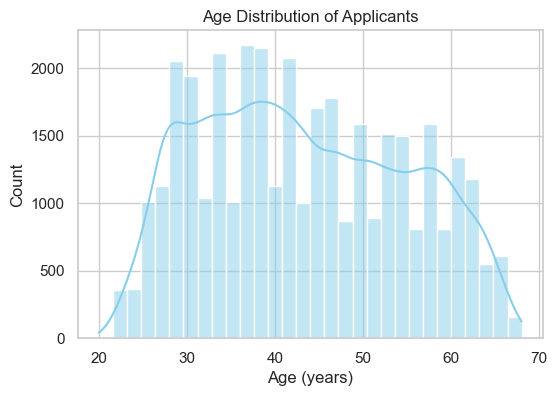

In [14]:
# age distribution
plt.figure(figsize=(6, 4))
sns.histplot(merged["AGE"], bins=30, kde=True, color="skyblue")
plt.title("Age Distribution of Applicants")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.show()

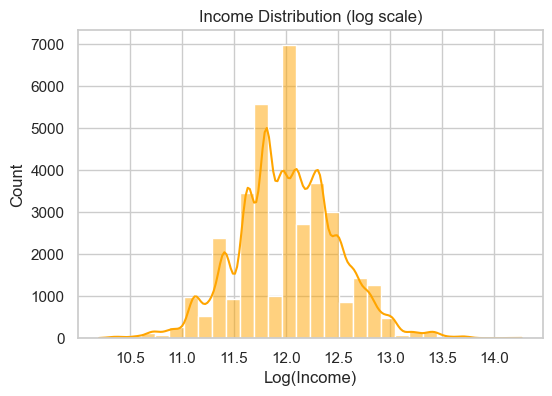

In [15]:
# income distribution (log scale)
plt.figure(figsize=(6, 4))
sns.histplot(np.log1p(merged["AMT_INCOME_TOTAL"]), bins=30, kde=True, color="orange")
plt.title("Income Distribution (log scale)")
plt.xlabel("Log(Income)")
plt.ylabel("Count")
plt.show()

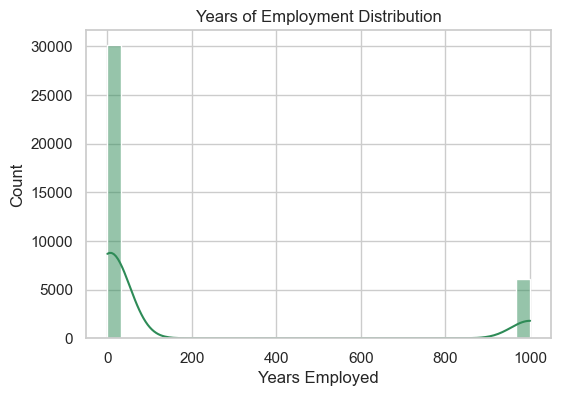

In [16]:
# employment years distribution ---
plt.figure(figsize=(6, 4))
sns.histplot(merged["YEARS_EMPLOYED"], bins=30, kde=True, color="seagreen")
plt.title("Years of Employment Distribution")
plt.xlabel("Years Employed")
plt.ylabel("Count")
plt.show()

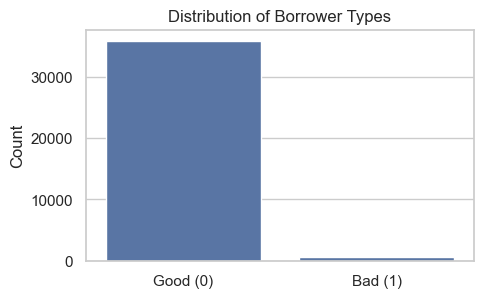

In [22]:
# target (good vs bad borrowers)
plt.figure(figsize=(5, 3))
sns.countplot(x="label", data=merged)
plt.title("Distribution of Borrower Types")
plt.xticks(ticks=[0, 1], labels=["Good (0)", "Bad (1)"])
plt.xlabel("")
plt.ylabel("Count")
plt.show()

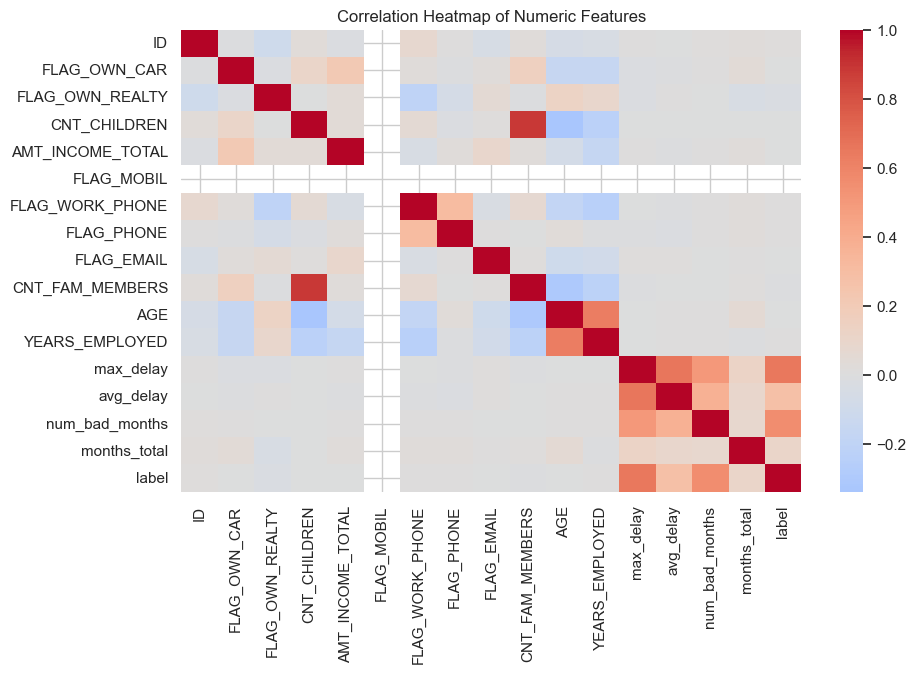

In [18]:
# correlation heatmap (numeric variables only)
numeric_cols = merged.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(10, 6))
sns.heatmap(merged[numeric_cols].corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

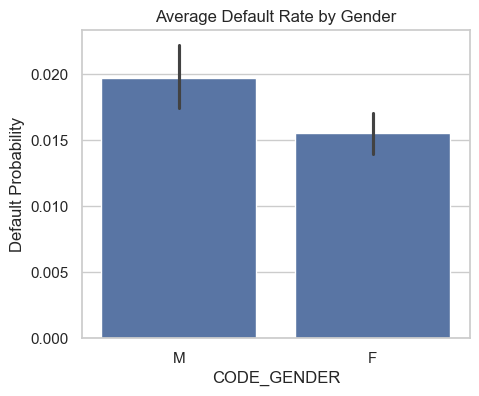

In [23]:
# gender vs default rate
plt.figure(figsize=(5,4))
sns.barplot(x="CODE_GENDER", y="label", data=merged)
plt.title("Average Default Rate by Gender")
plt.ylabel("Default Probability")
plt.show()

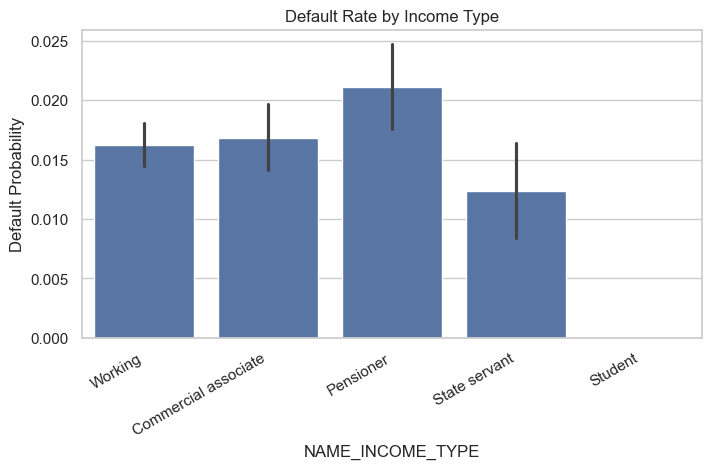

In [24]:
# income type vs default rate
plt.figure(figsize=(8,4))
sns.barplot(x="NAME_INCOME_TYPE", y="label", data=merged)
plt.title("Default Rate by Income Type")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Default Probability")
plt.show()

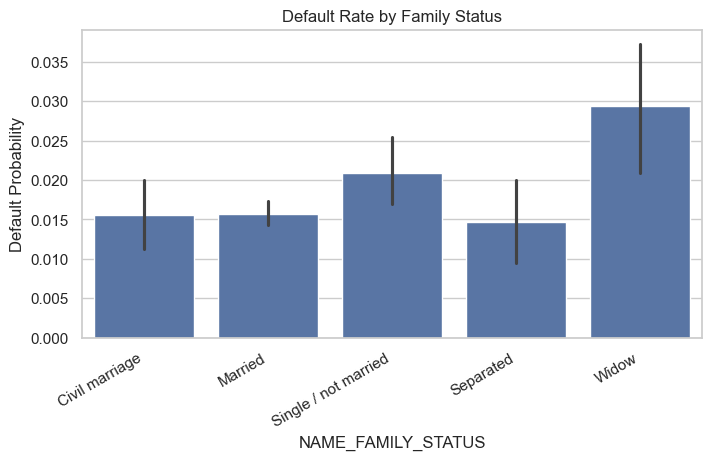

In [25]:
# family status vs default rate
plt.figure(figsize=(8,4))
sns.barplot(x="NAME_FAMILY_STATUS", y="label", data=merged)
plt.title("Default Rate by Family Status")
plt.xticks(rotation=30, ha="right")
plt.ylabel("Default Probability")
plt.show()